<a href="https://colab.research.google.com/github/Madhuvod/AI-Rover/blob/main/02_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network Classification using pytorch

In [1]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state = 42)  #here X is features and y is labels
X[:5], y[:5]


(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [2]:
import pandas as pd

circles = pd.DataFrame({'X1': X[:,0],'X2': X[:, 1],
              'y': y})
circles.head(10)

,X1,X2,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [3]:
circles.value_counts()

X1         X2         y
-1.059502   0.224777  0    1
 0.453339   0.892714  0    1
 0.418715   0.684283  1    1
 0.422111  -0.937240  0    1
 0.422801  -0.708743  1    1
                          ..
-0.423395   0.687718  1    1
-0.421819  -0.679585  1    1
-0.418343  -0.678254  1    1
-0.417656  -0.640403  1    1
 1.033712  -0.046817  0    1
Name: count, Length: 1000, dtype: int64

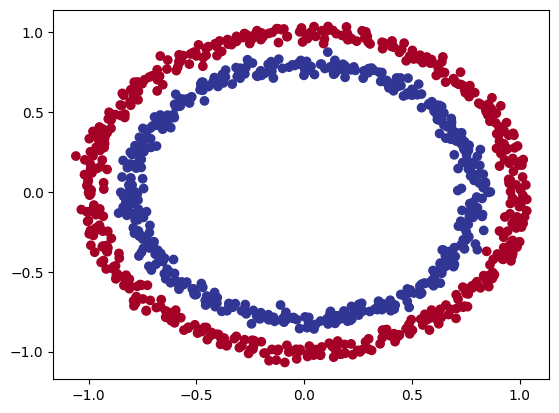

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [5]:
import torch
torch.__version__

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

In [7]:
n_samples

1000

as of now, we have learned about getting/collection the data -- through sklearn libs - (make_circles(n_samples, noise = 0.03, random_state = 42) and represent that data into a table from through - pandas - pd.DataFrame.

and also observed the sizes of X (features) and y (labels) are diff - 2 dim and 1 dim respectively.

we have also turned the data into tensors by importing torch and using the method torch.from_numpy(X).type(torch.float), and is in turned divided into test,train split easily using the train_test_split which is imorted from sklearn.model_selection



In [8]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [9]:
class LinearlayerV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))
model_0 = LinearlayerV0().to(device)
model_0

LinearlayerV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [10]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)
model_0, device

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 'cpu')

In [11]:
untrained_preds = model_0(X_test.to(device))
untrained_preds[:10], y_test[:10]

(tensor([[0.6374],
         [0.5338],
         [0.6318],
         [0.6402],
         [0.1914],
         [0.1315],
         [0.1886],
         [0.0933],
         [0.6504],
         [0.5220]], grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [12]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1520,  0.4391],
                      [-0.3415, -0.3028],
                      [-0.4581,  0.3528],
                      [ 0.6810,  0.0424],
                      [ 0.0892, -0.0948]])),
             ('0.bias', tensor([ 0.6632,  0.0645,  0.1357, -0.6538,  0.5656])),
             ('1.weight',
              tensor([[-0.0733, -0.1698,  0.2736, -0.3716, -0.2231]])),
             ('1.bias', tensor([0.3286]))])

In [13]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [14]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

NOW, Training:

In [15]:
y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[0.6374],
        [0.5338],
        [0.6318],
        [0.6402],
        [0.1914]], grad_fn=<SliceBackward0>)

In [16]:
y_pred_logits = torch.sigmoid(y_logits)
y_pred_logits[:5]

tensor([[0.6542],
        [0.6304],
        [0.6529],
        [0.6548],
        [0.5477]], grad_fn=<SliceBackward0>)

In [17]:
y_preds = torch.round(y_pred_logits)
y_preds[:5]
y_preds.squeeze()[:5]
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]
torch.eq(y_preds[:5], y_preds_labels)[:5]




tensor([[True],
        [True],
        [True],
        [True],
        [True]])

In [18]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.72222, Accuracy: 50.00% | Test loss: 0.71809, Test acc: 50.00%
Epoch: 10 | Loss: 0.70372, Accuracy: 54.50% | Test loss: 0.70177, Test acc: 54.00%
Epoch: 20 | Loss: 0.69805, Accuracy: 50.88% | Test loss: 0.69693, Test acc: 55.00%
Epoch: 30 | Loss: 0.69610, Accuracy: 50.00% | Test loss: 0.69540, Test acc: 56.00%
Epoch: 40 | Loss: 0.69526, Accuracy: 49.50% | Test loss: 0.69486, Test acc: 52.50%
Epoch: 50 | Loss: 0.69478, Accuracy: 49.75% | Test loss: 0.69464, Test acc: 52.00%
Epoch: 60 | Loss: 0.69445, Accuracy: 50.00% | Test loss: 0.69453, Test acc: 51.50%
Epoch: 70 | Loss: 0.69420, Accuracy: 49.75% | Test loss: 0.69447, Test acc: 50.50%
Epoch: 80 | Loss: 0.69400, Accuracy: 49.62% | Test loss: 0.69445, Test acc: 51.00%
Epoch: 90 | Loss: 0.69383, Accuracy: 49.38% | Test loss: 0.69444, Test acc: 52.00%


In [73]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

NameError: name 'model_0' is not defined

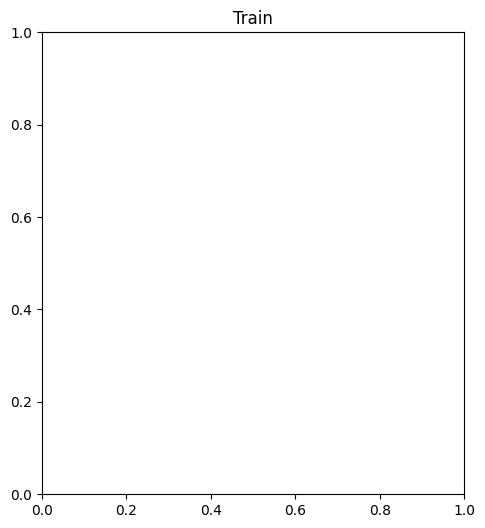

In [74]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test,y_test)


In [21]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [22]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [23]:
# Training
torch.manual_seed(43)
epochs = 1000

# Ensure X_train and y_train have the same number of samples
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Make sure y_train and y_test are the correct shape (N, 1)
y_train = y_train.view(-1, 1).float()
y_test = y_test.view(-1, 1).float()

for epoch in range(epochs):
    model_1.train()
    # Forward pass
    model_logits = model_1(X_train)

    # Calculate loss, accuracy
    loss = loss_fn(model_logits, y_train)
    accuracy = accuracy_fn(y_true=y_train, y_pred=torch.round(torch.sigmoid(model_logits)))

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test)
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=torch.round(torch.sigmoid(test_logits)))

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {accuracy:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


In [24]:
#5
start = 0
end = 1
step = 0.01
weight = 0.7
bias = 0.3

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

X_regression[:5], y_regression[:5]


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [25]:
train_split = int( 0.8 * len(X_regression))
X_train_rg, y_train_rg = X_regression[:train_split], y_regression[:train_split]
X_test_rg, y_test_rg = X_regression[train_split:], y_regression[train_split:]

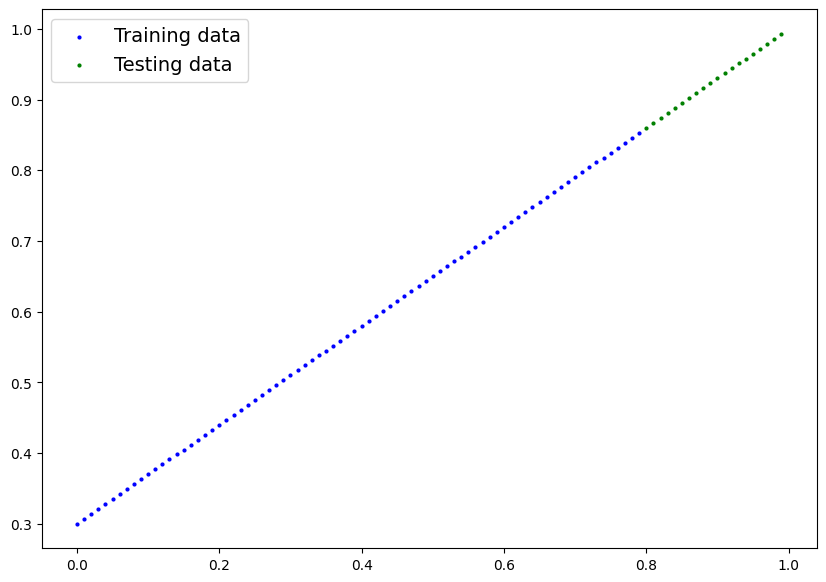

In [26]:
plot_predictions(train_data = X_train_rg, train_labels = y_train_rg, test_data = X_test_rg, test_labels = y_test_rg, predictions=None)

In [27]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [28]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [29]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_rg, y_train_rg = X_train_rg.to(device), y_train_rg.to(device)
X_test_rg, y_test_rg = X_test_rg.to(device), y_test_rg.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_rg)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_rg)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_rg)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_rg)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.66487, Test loss: 0.68716
Epoch: 100 | Train loss: 0.06604, Test loss: 0.02171
Epoch: 200 | Train loss: 0.08369, Test loss: 0.01247
Epoch: 300 | Train loss: 0.06990, Test loss: 0.02572
Epoch: 400 | Train loss: 0.05672, Test loss: 0.00847
Epoch: 500 | Train loss: 0.06882, Test loss: 0.01703
Epoch: 600 | Train loss: 0.05265, Test loss: 0.00823
Epoch: 700 | Train loss: 0.05656, Test loss: 0.00754
Epoch: 800 | Train loss: 0.05362, Test loss: 0.00653
Epoch: 900 | Train loss: 0.05169, Test loss: 0.00669


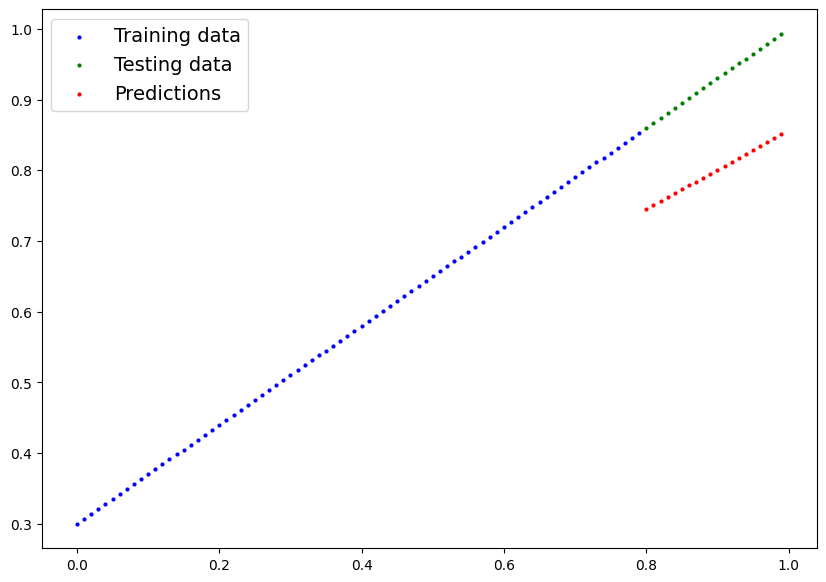

In [30]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_rg)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_rg.cpu(),
                 train_labels=y_train_rg.cpu(),
                 test_data=X_test_rg.cpu(),
                 test_labels=y_test_rg.cpu(),
                 predictions=y_preds.cpu());

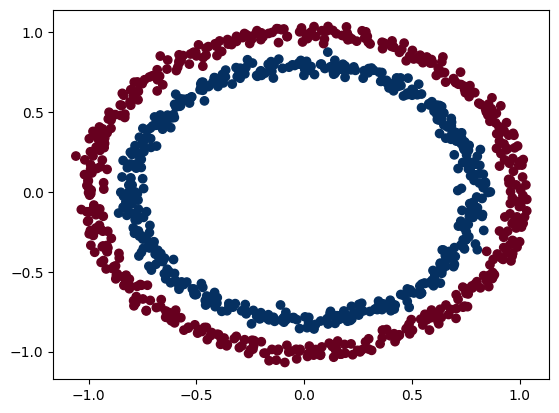

In [31]:
#non-linearity
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [32]:
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [33]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [34]:
 model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [35]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr = 1) #changed the learning rate from 0.1 to 1 to better test accruacy


In [36]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_preds)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | loss: {loss: .5f}, accuracy: {acc:.2f}% | test_loss : {test_loss: .5f} and test_accuracy : {test_acc: .2f}%")


Epoch: 0 | loss:  0.69295, accuracy: 50.00% | test_loss :  0.69263 and test_accuracy :  50.00%
Epoch: 100 | loss:  0.57721, accuracy: 86.38% | test_loss :  0.57616 and test_accuracy :  86.50%
Epoch: 200 | loss:  1.42088, accuracy: 50.00% | test_loss :  0.57300 and test_accuracy :  62.50%
Epoch: 300 | loss:  0.22560, accuracy: 97.38% | test_loss :  0.21572 and test_accuracy :  97.00%
Epoch: 400 | loss:  0.03318, accuracy: 100.00% | test_loss :  0.05350 and test_accuracy :  99.50%
Epoch: 500 | loss:  0.01001, accuracy: 100.00% | test_loss :  0.02316 and test_accuracy :  100.00%
Epoch: 600 | loss:  0.00586, accuracy: 100.00% | test_loss :  0.01682 and test_accuracy :  100.00%
Epoch: 700 | loss:  0.00411, accuracy: 100.00% | test_loss :  0.01385 and test_accuracy :  100.00%
Epoch: 800 | loss:  0.00316, accuracy: 100.00% | test_loss :  0.01206 and test_accuracy :  100.00%
Epoch: 900 | loss:  0.00256, accuracy: 100.00% | test_loss :  0.01085 and test_accuracy :  100.00%


In [37]:
y_logits.shape, y_train.size()

(torch.Size([800]), torch.Size([800]))

In [38]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
dub = torch.tensor(y)
dub[:10]

<ipython-input-38-63275c612b32>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dub = torch.tensor(y)


tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.])

NameError: name 'plot_decision_boundary' is not defined

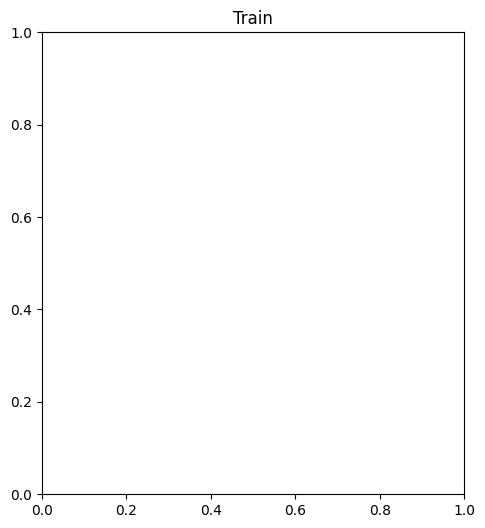

In [72]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


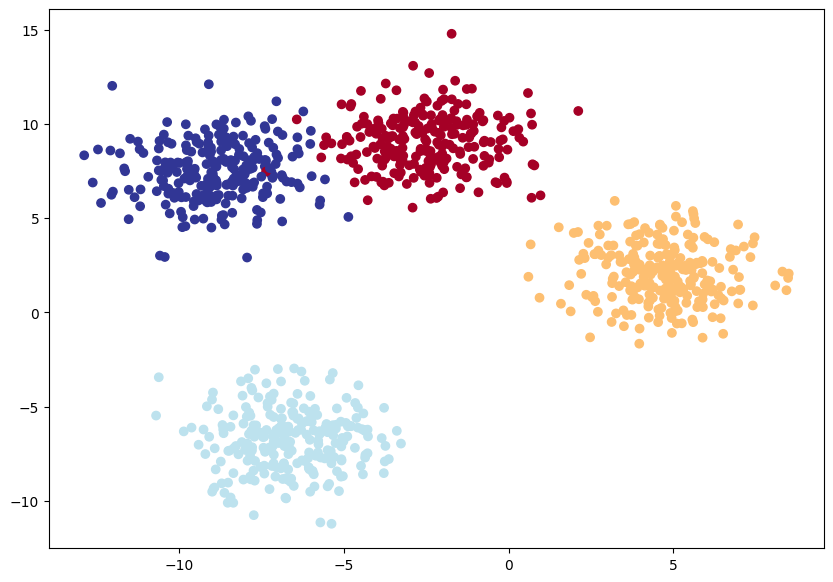

In [40]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [49]:
from torch import nn

class blobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_layers = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features= hidden_layers),
        nn.Linear(in_features = hidden_layers, out_features= hidden_layers),
        nn.Linear(in_features = hidden_layers, out_features= output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)
model_4 = blobModel(input_features = NUM_FEATURES, output_features = NUM_CLASSES, hidden_layers = 8)
model_4

blobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [50]:
#loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr = 0.1)

In [54]:
torch.manual_seed(42)

epochs = 100

X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train, y_pred = y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test, y_pred = test_preds)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | loss: {loss: .5f}, accuracy: {acc: .2f}% | test_loss: {test_loss: .5f}, test_accuracy: {test_acc: .2f}%")



Epoch: 0 | loss:  0.34478, accuracy:  98.75% | test_loss:  0.28865, test_accuracy:  99.00%
Epoch: 10 | loss:  0.11536, accuracy:  99.12% | test_loss:  0.10464, test_accuracy:  99.00%
Epoch: 20 | loss:  0.07218, accuracy:  99.12% | test_loss:  0.06403, test_accuracy:  99.50%
Epoch: 30 | loss:  0.05544, accuracy:  99.12% | test_loss:  0.04755, test_accuracy:  99.50%
Epoch: 40 | loss:  0.04681, accuracy:  99.00% | test_loss:  0.03884, test_accuracy:  99.50%
Epoch: 50 | loss:  0.04163, accuracy:  99.00% | test_loss:  0.03349, test_accuracy:  99.50%
Epoch: 60 | loss:  0.03820, accuracy:  99.00% | test_loss:  0.02988, test_accuracy:  99.50%
Epoch: 70 | loss:  0.03578, accuracy:  99.00% | test_loss:  0.02729, test_accuracy:  99.50%
Epoch: 80 | loss:  0.03400, accuracy:  99.12% | test_loss:  0.02534, test_accuracy:  99.50%
Epoch: 90 | loss:  0.03263, accuracy:  99.12% | test_loss:  0.02381, test_accuracy:  99.50%


In [55]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3893,  10.4674, -15.0226,  -9.8527],
        [  5.0461, -12.1644,   3.4229,  10.7590],
        [ -5.6640, -13.4871,  21.1646,  12.8820],
        [  1.8633,   7.6432,  -8.6776,  -7.0577],
        [  8.1531,   3.3285, -14.7182,  -3.6549],
        [  5.6185, -15.1107,   5.0693,  13.4007],
        [ -6.0495, -10.2997,  19.0210,  10.0041],
        [  7.1412,  -0.7659,  -9.6282,   0.1706],
        [ -5.6736, -18.7978,  25.7467,  17.7327],
        [  7.3841,   0.7299, -11.2911,  -1.2161]])

In [56]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


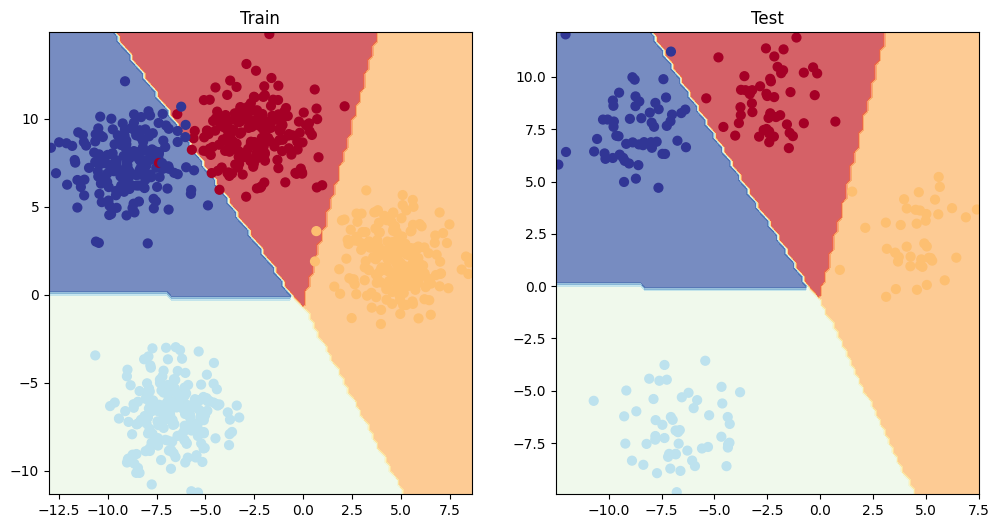

In [57]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [19]:
import torch
import sklearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 42)
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)
X[:5], y[:10]


(tensor([[-0.1117,  0.5202],
         [ 1.1426, -0.3426],
         [ 0.7956, -0.0114],
         [ 0.1118, -0.5519],
         [-0.8165,  0.5440]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [18]:
import pandas as pd

df1 = pd.DataFrame({"X0": X[:,0],
                    "X1": X[:,1],
                    "y": y})
df1

,X0,X1,y
0,-0.111667,0.520224,1.0
1,1.142650,-0.342577,1.0
2,0.795558,-0.011442,1.0
3,0.111827,-0.551932,1.0
4,-0.816466,0.543996,0.0
...,...,...,...
995,0.835830,0.435532,0.0
996,-0.195852,0.833794,0.0
997,1.727608,-0.428829,1.0
998,-1.014486,0.135229,0.0


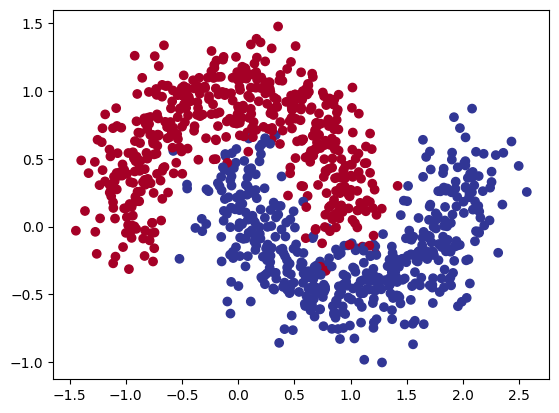

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu )

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train = X_train.to(torch.float64)
X_train.dtype

torch.float64

In [47]:
from torch import nn
class KalyanModelV1(nn.Module):
  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features=out_features)
    )


  def forward(self, x):
    return self.linear_layer_stack(x)
model_5 = KalyanModelV1(in_features = 2, out_features = 1, hidden_units = 10)
model_5, X_train.dtype


(KalyanModelV1(
   (linear_layer_stack): Sequential(
     (0): Linear(in_features=2, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 torch.float64)

In [32]:
model_5.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.6632,  0.2620],
                      [-0.2197, -0.3410],
                      [-0.6212, -0.3700],
                      [-0.6508, -0.2140],
                      [-0.0251,  0.0863],
                      [-0.0336, -0.1714],
                      [-0.0701, -0.3110],
                      [ 0.6974,  0.6428],
                      [-0.0346,  0.1701],
                      [ 0.2100,  0.4154]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.2342,  0.3665, -0.6175, -0.6807, -0.3080, -0.2405,  0.4281,  0.6377,
                      -0.0835, -0.6130])),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.0113, -0.2314,  0.0745,  0.1576,  0.0439,  0.2275,  0.1520,  0.2489,
                        0.2791, -0.0526],
                      [-0.0682,  0.2167, -0.2622,  0.0786,  0.0084, -0.0452,  0.1026, -0.2109,
                       -0.1190, -0.1067],
                      [ 0.2528,  

In [66]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_5.parameters(), lr= 0.2)

In [37]:
pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [41]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [60]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [68]:
torch.manual_seed(42)
from torch import tensor
epochs = 1000

X_train, X_test, y_train, y_test = X_train.to(device).float(), X_test.to(device).float(), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  model_5.train()
  y_logits = model_5(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_pred_probs = torch.sigmoid(y_logits)
  y_preds = torch.round(y_pred_probs)


  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_preds, y_train.int())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_preds,y_test.int())
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | loss: {loss: .5f}, accuracy: {acc: .2f}% | test_loss: {test_loss: .5f}, test_acc: {test_acc: .2f}%")





epoch: 0 | loss:  0.08319, accuracy:  0.97% | test_loss:  0.06236, test_acc:  0.98%
epoch: 100 | loss:  0.07886, accuracy:  0.97% | test_loss:  0.05834, test_acc:  0.98%
epoch: 200 | loss:  0.07609, accuracy:  0.97% | test_loss:  0.05457, test_acc:  0.98%
epoch: 300 | loss:  0.07365, accuracy:  0.97% | test_loss:  0.05294, test_acc:  0.98%
epoch: 400 | loss:  0.07110, accuracy:  0.97% | test_loss:  0.05147, test_acc:  0.98%
epoch: 500 | loss:  0.06942, accuracy:  0.98% | test_loss:  0.04960, test_acc:  0.98%
epoch: 600 | loss:  0.06811, accuracy:  0.98% | test_loss:  0.04765, test_acc:  0.98%
epoch: 700 | loss:  0.06705, accuracy:  0.98% | test_loss:  0.04609, test_acc:  0.98%
epoch: 800 | loss:  0.06612, accuracy:  0.98% | test_loss:  0.04510, test_acc:  0.98%
epoch: 900 | loss:  0.06533, accuracy:  0.98% | test_loss:  0.04382, test_acc:  0.98%


In [76]:
with torch.inference_mode():
  model_5.eval()
  y_logits = model_5(X_test)
  y_preds = torch.softmax(y_logits, dim = 1).argmax(dim= 1)
y_logits[:10], y_preds[:10]

(tensor([[  7.2095],
         [ -9.1861],
         [  6.9434],
         [-12.1594],
         [ 11.8606],
         [ 13.4826],
         [ -3.6521],
         [ -2.8417],
         [ 15.3696],
         [ -4.8913]]),
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

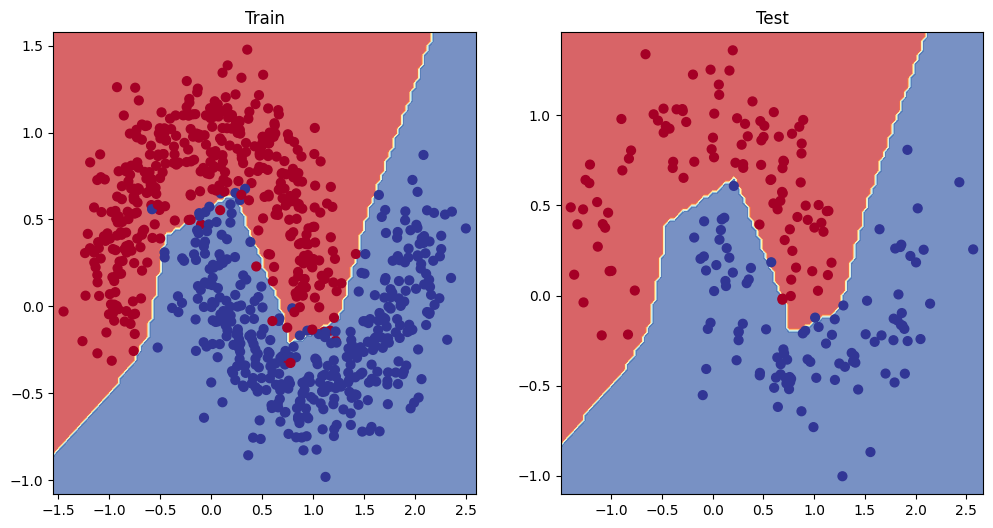

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)

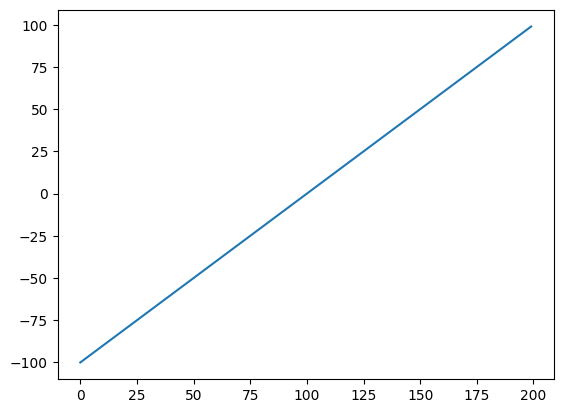

In [80]:
tensor_a = torch.arange(-100,100, 1)
plt.plot(tensor_a)

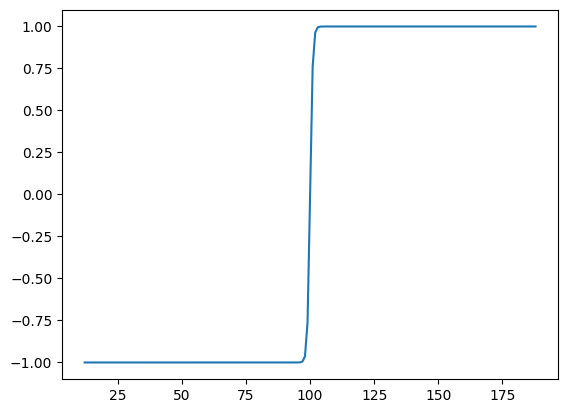

In [81]:
#tanh hyperbolic function -

def tanh(z):
	return (torch.exp(z) - torch.exp(-z)) / (torch.exp(z) + torch.exp(-z))
plt.plot(tanh(tensor_a))


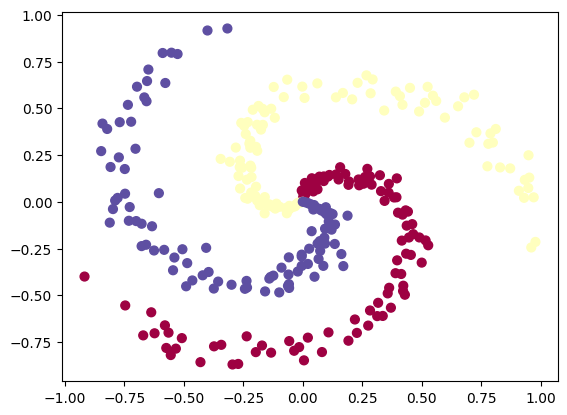

In [86]:
import numpy as np
RANDOM_SEED = 42
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [87]:
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [88]:
from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [89]:
class SpiralModelV1(nn.Module):
  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = in_features, out_features = hidden_units)
    self.tanh = nn.Tanh()
    self.layer_2 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
    self.tanh = nn.Tanh()
    self.layer_3 = nn.Linear(in_features = hidden_units, out_features = out_features)
  def forward(self, x):
    return self.layer_3(self.tanh(self.layer_2(self.tanh(self.layer_1(x)))))
model_6 = SpiralModelV1(in_features = 2, out_features = 3, hidden_units = 10)
model_6



SpiralModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (tanh): Tanh()
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=3, bias=True)
)

In [90]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_6.parameters(), lr=0.01)

In [91]:
torch.manual_seed(42)
epochs = 1000

X_train, X_test, y_train, y_test = X_train.to(device).float(), X_test.to(device).float(), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  model_6.train()
  y_logits = model_6(X_train).squeeze()
  # print(y_logits[:5]) # model raw outputs are "logits"
  y_preds = torch.softmax(y_logits, dim =1).argmax(dim=1)


  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_preds, y_train.int())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_6.eval()
  with torch.inference_mode():
    test_logits = model_6(X_test).squeeze()
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_preds,y_test.int())
  if epoch % 100 == 0:
    print(f"epoch: {epoch} | loss: {loss: .5f}, accuracy: {acc: .2f}% | test_loss: {test_loss: .5f}, test_acc: {test_acc: .2f}%")




epoch: 0 | loss:  1.15744, accuracy:  0.38% | test_loss:  1.16522, test_acc:  0.37%
epoch: 100 | loss:  0.53860, accuracy:  0.70% | test_loss:  0.62261, test_acc:  0.58%
epoch: 200 | loss:  0.14528, accuracy:  0.96% | test_loss:  0.15003, test_acc:  0.98%
epoch: 300 | loss:  0.05928, accuracy:  0.99% | test_loss:  0.04653, test_acc:  1.00%
epoch: 400 | loss:  0.03808, accuracy:  0.99% | test_loss:  0.02317, test_acc:  1.00%
epoch: 500 | loss:  0.02954, accuracy:  0.99% | test_loss:  0.01367, test_acc:  1.00%
epoch: 600 | loss:  0.02503, accuracy:  0.99% | test_loss:  0.00916, test_acc:  1.00%
epoch: 700 | loss:  0.02209, accuracy:  0.99% | test_loss:  0.00694, test_acc:  1.00%
epoch: 800 | loss:  0.02002, accuracy:  0.99% | test_loss:  0.00523, test_acc:  1.00%
epoch: 900 | loss:  0.01865, accuracy:  0.99% | test_loss:  0.00407, test_acc:  1.00%


In [93]:
with torch.inference_mode():
  model_6.eval()
  y_logits = model_6(X_test)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_logits[:5], y_preds[:5]

(tensor([[-0.8363, -2.3543,  4.1828],
         [ 1.1860, -1.5553,  5.5230],
         [-2.7798,  5.8193, -5.8725],
         [ 4.6079, -4.7705,  0.1639],
         [-3.9176, -0.7526,  7.1608]]),
 tensor([2, 2, 1, 0, 2]))

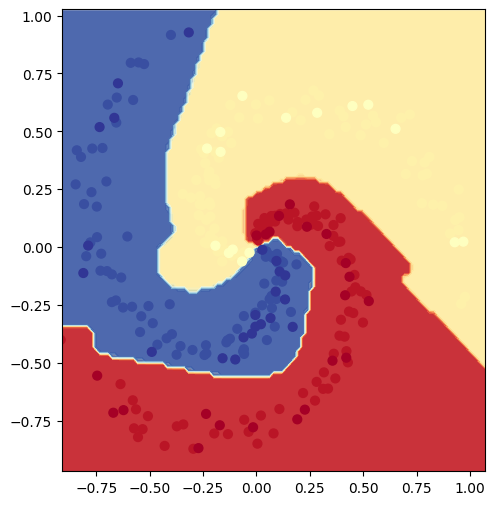

In [92]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title = "Train"
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1,2,1)
plt.title = "Test"
plot_decision_boundary(model_6, X_test, y_test)
